## Introduction

In the previous section, we have cleaned whole dataset(train and test) while maintained size and shape of data same as original.(Refer:https://www.kaggle.com/lajari/sec1-tedious-data-cleaning). We are going to use this cleaned data for further analysis and feature engineering. 

Our main focus in this section, will be on EDA, feature engineering and feature selection for numerical features only. At every step of our data analysis we are evaluating one test model to analyse the impact of our engineered data on overall performance in terms RMSE. This test model is nothing but just simple linear regressor. 


### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_rows',100,'max_columns',100)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Load Cleaned Data

In [2]:
train = pd.read_csv('/kaggle/input/sec1-tedious-data-cleaning/ctrain.csv')
test = pd.read_csv('/kaggle/input/sec1-tedious-data-cleaning/ctest.csv')

nulltrain = train.isnull().sum()
print(nulltrain[nulltrain>0])

nulltest = test.isnull().sum()
print(nulltest[nulltest>0])


Series([], dtype: int64)
Series([], dtype: int64)


In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NAv,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NAv,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NAv,NAv,NAv,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,NAv,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,NAv,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,NAv,NAv,NAv,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,NAv,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NAv,NAv,NAv,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,NAv,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,NAv,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,NAv,NAv,NAv,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,NAv,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NAv,NAv,NAv,0.0,12.0,2008.0,WD,Normal,250000.0


In [5]:
catcols = train.select_dtypes(object).columns
numcols = train.select_dtypes(np.number).columns

print('Total categorical columns:',len(catcols),'\nTotal numerical columns:', len(numcols))

Total categorical columns: 43 
Total numerical columns: 38


In [6]:
## Useful functions


def outlier_detector(df,feature):
    """
    Detect rows which contains negative/positive outlier in any feature columns
    
    """
    rows = (((df[feature] - df[feature].mean()) > (3*df[feature].std())) | ((df[feature] - df[feature].mean()) < (-3*df[feature].std()))).any(axis=1)
    return rows

    

def test_model(data,features,target):
    """
    Evaluate RMSE for simple Linear Regression model with given features and target
    
    """
    
    all_X = data[features].copy()
    
    scaler = StandardScaler()
    all_X = scaler.fit_transform(all_X)
    
    all_y = data[target].copy()
    
    X_train,X_test,y_train,y_test = train_test_split(all_X,all_y, test_size=0.3, random_state = 0,shuffle=True)
    
   
    model = LinearRegression().fit(X_train,y_train)
    prediction = model.predict(X_test)
    y_test = np.exp(y_test) - 1
    prediction =np.exp(prediction) - 1
    
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    
    print("Result of test model\n\nFeatures:",list(features),"\n\nTarget:",target,"\n\nRMSE:{:.4f}".format(rmse))

    
    

## Analyse SalePrice:
Target column is right skewed and may contain some outliers. If we use parametric model for regression then it is important to normalize the data as it is underlaying assumption for most linear models. But if we use non parametric model such as tree based regressor it doesn't require.

Text(0.5, 1.0, 'Skew: 0.94')

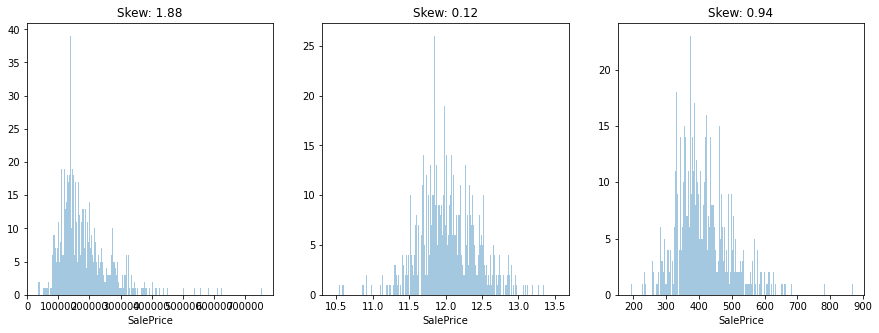

In [7]:
# SalePrice Analysis

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
logform = np.log1p(train['SalePrice'])
sqrtform =np.sqrt(train['SalePrice'])

sns.distplot(train['SalePrice'], bins =500,kde=False,ax=ax1).set_title('Skew: {:.2f}'.format(train['SalePrice'].skew()))
sns.distplot(logform,bins = 500,kde=False,ax=ax2).set_title('Skew: {:.2f}'.format(logform.skew()))
sns.distplot(sqrtform, bins= 500, kde=False, ax=ax3).set_title('Skew: {:.2f}'.format(sqrtform.skew()))

In [8]:
# We would chose log version of SalePrice as our target
train['LogPrice'] = logform

# Detect outliers in target column
outliers = outlier_detector(train,['LogPrice'])
print('Number of outliers:',outliers.sum())

# Remove Outliers
train = train[~outliers]

Number of outliers: 12


In [9]:
# Test model with all available features and newly created target variable 'LogPrice'
features = train.select_dtypes(np.number).columns.drop(['SalePrice','LogPrice'])
test_model(train,features,'LogPrice')

Result of test model

Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Target: LogPrice 

RMSE:157419.8091


## EDA and Feature Engneering

Under this subsection, we will follow below steps 
1. Collinearity Analysis
2. Outlier Removal
3. Feature Engineering

### Analysis for collinearity:

Collinear features affect the intepretability of machine learning model as well as it increases the complexity. Therefore, it is safe to remove them as it would not affect much on final prediction accuracy. In this context, correlation> 0.8 between two features is considered as collinear features.(Refer this link for more detail: https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168). We would analyze their role carefully before decide on their removal.

In [10]:
cormat = train.corr()
cormat.style.applymap(lambda x: 'background-color : yellow' if (x>0.8) & (x!=1) else '')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogPrice
Id,1,0.0110383,-0.00619547,-0.0359883,-0.0356124,0.0117094,-0.0162993,-0.0253969,-0.0595366,-0.00928761,-0.00422487,-0.00910521,-0.0206513,0.00505729,5.67972e-05,-0.0442608,-0.00042689,-0.000156367,-0.0198901,-0.000155136,0.00275274,0.0352436,0.00310403,0.0219367,-0.0229465,0.0119997,0.0121509,0.0131029,-0.0331876,0.00141481,0.00709108,-0.0466743,0.0025579,0.0504208,-0.00619814,0.0210099,0.0030595,-0.0385911,-0.0299558
MSSubClass,0.0110383,1,-0.38896,-0.140755,0.031249,-0.062914,0.0277545,0.0395238,0.0254301,-0.0683435,-0.0646724,-0.143751,-0.243296,-0.257308,0.310217,0.0462337,0.0755471,0.00474784,-0.00315888,0.131574,0.177143,-0.0286909,0.281594,0.040321,-0.0451805,-0.0870015,-0.0422566,-0.101712,-0.0150099,-0.00375138,-0.0127605,-0.0441719,-0.0252353,0.00798509,-0.0079121,-0.0145111,-0.0205778,-0.0907068,-0.0812306
LotFrontage,-0.00619547,-0.38896,1,0.399525,0.203341,-0.0295414,0.0874213,0.0535974,0.163308,0.216103,0.0674708,0.107949,0.362355,0.433598,0.0695076,0.0346688,0.386384,0.0929946,0.0222801,0.185817,0.0526917,0.26619,-0.00575628,0.34024,0.257824,0.104253,0.26627,0.331615,0.106528,0.146564,0.029391,0.0743125,0.0366515,0.151168,0.00700428,0.0165227,0.00498408,0.329356,0.339772
LotArea,-0.0359883,-0.140755,0.399525,1,0.0951447,-0.00558736,0.00919804,0.00926426,0.0882084,0.20975,0.111607,-0.00534262,0.256082,0.295707,0.0411166,0.00513947,0.256391,0.156777,0.0459593,0.117587,0.00928962,0.11516,-0.0172372,0.1835,0.268496,0.0693742,0.14843,0.174781,0.166703,0.0855672,-0.0166989,0.0208229,0.0424986,0.0784941,0.0384419,0.00264925,-0.0114683,0.263064,0.2538
OverallQual,-0.0356124,0.031249,0.203341,0.0951447,1,-0.102653,0.568794,0.545061,0.393337,0.218208,-0.0664669,0.306113,0.517502,0.452407,0.281541,-0.030786,0.574178,0.107505,-0.0488917,0.536162,0.264474,0.0831225,-0.188126,0.404157,0.383897,0.277228,0.58883,0.550581,0.232072,0.319878,-0.11099,0.0316738,0.0569562,0.0426142,-0.0319195,0.0813583,-0.0285033,0.797783,0.808986
OverallCond,0.0117094,-0.062914,-0.0295414,-0.00558736,-0.102653,1,-0.38254,0.0692731,-0.130339,-0.0474979,0.0399975,-0.139859,-0.178163,-0.151385,0.0296378,0.0248842,-0.0855765,-0.0546367,0.116505,-0.202107,-0.0629914,0.00671951,-0.0887728,-0.0618587,-0.0258068,-0.0127841,-0.192765,-0.157291,-0.0065272,-0.0311851,0.0721717,0.0249176,0.0561208,0.00274311,0.0685917,-0.0042145,0.0416037,-0.0835979,-0.0495435
YearBuilt,-0.0162993,0.0277545,0.0874213,0.00919804,0.568794,-0.38254,1,0.58803,0.310003,0.243079,-0.052381,0.145477,0.38408,0.270001,0.00270993,-0.184974,0.186297,0.185163,-0.0407851,0.463264,0.237185,-0.079496,-0.175943,0.0801742,0.137947,0.264313,0.530976,0.471435,0.221999,0.197291,-0.385517,0.0315724,-0.0564685,-0.00301726,-0.0345976,0.0177702,-0.0128103,0.538666,0.58673
YearRemodAdd,-0.0253969,0.0395238,0.0535974,0.00926426,0.545061,0.0692731,0.58803,1,0.170922,0.119938,-0.0715358,0.177426,0.280705,0.22722,0.136533,-0.0630564,0.279669,0.117119,-0.0143107,0.433108,0.177315,-0.0508117,-0.151019,0.178098,0.102553,0.13447,0.411348,0.362095,0.202855,0.235624,-0.191017,0.0454161,-0.0448671,0.000677111,-0.0105017,0.0264288,0.0351974,0.524494,0.563476
MasVnrArea,-0.0595366,0.0254301,0.163308,0.0882084,0.393337,-0.130339,0.310003,0.170922,1,0.245978,-0.0722398,0.111869,0.345187,0.323252,0.15205,-0.0698257,0.36396,0.0819772,0.0136671,0.254909,0.19009,0.093371,-0.0374671,0.260331,0.237738,0.131344,0.354257,0.363322,0.147435,0.125783,-0.108389,0.0212033,0.0625335,0.0200045,-0.0296123,0.00645244,-0.0046333,0.44697,0.410857
BsmtFinSF1,-0.00928761,-0.0683435,0.216103,0.20975,0.218208,-0.0474979,0.243079,0.

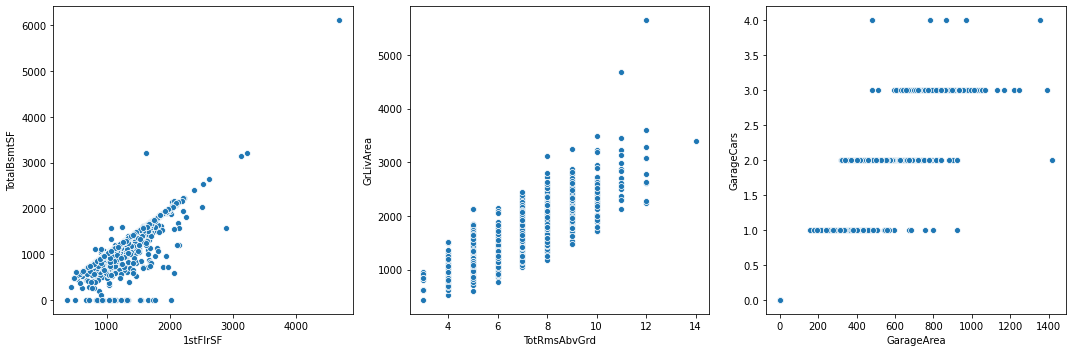

In [11]:
# We are definitely keeping feature which has high correlation with target like OverallQual.
# tuple list with very high correlation. 
tuplist = [('1stFlrSF','TotalBsmtSF') ,('TotRmsAbvGrd','GrLivArea'),('GarageArea','GarageCars')]

fig,axs = plt.subplots(1,3,figsize=(15,5))
axs = axs.flatten()
for i,tup in enumerate(tuplist):
    sns.scatterplot(train[tup[0]],train[tup[1]], ax = axs[i])
    plt.tight_layout()

We found some interesting insight:
1. In some houses, basement is bigger than 1st Floor which is very less probability among all properties.(Refer:1st plot).
2. ratio of ground living area to total room above ground is very high for some house which could be possible if rooms are bigger than usual. This important information need to be preserved. So we generate ** new feature 'RoomSize'** (Refer: 2nd plot and boxplot below).
3. Garage capacity increases with Garage Area (Refer: 3rd Plot)


In short we will remove collinear features ['TotRmsAbvGrd','GarageCars','TotalBsmtSF'] but after feature engineering stage.

Text(0.5, 1.0, 'corr:0.55')

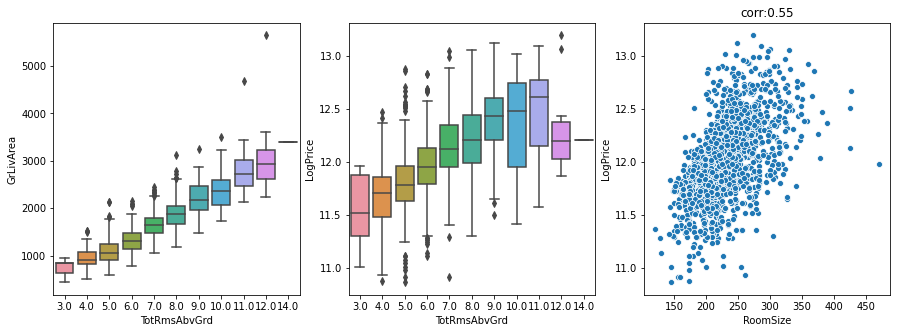

In [12]:
# New Feature from above analysis is 'Roomsize'
train['RoomSize'] = train['GrLivArea']/train['TotRmsAbvGrd']
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(train[tuplist[1][0]],train[tuplist[1][1]],ax=ax1)
sns.boxplot(train[tuplist[1][0]],train['LogPrice'],ax=ax2)
sns.scatterplot(train['RoomSize'],train['LogPrice'],ax=ax3).set_title('corr:{:.2f}'.format(train['RoomSize'].corr(train['LogPrice'])))



### Outlier Removal:

There are many features which has significant correlation with target variable. As well as there are many data points that could possibly outlier in some pairplot in which Y-axis is SalePrice .For e.g. Unusual SalePrice for OverallCond 2 in following scatterpolt(2nd Row,2nd column). Our intutition is , It could be influence of other features which made SalePrice so unsusual. So It would be harmful if we remove such outlier. Instead, we will remove outliers which shows unusual behavior of feature. (E.g. Lot Area > 100000). 

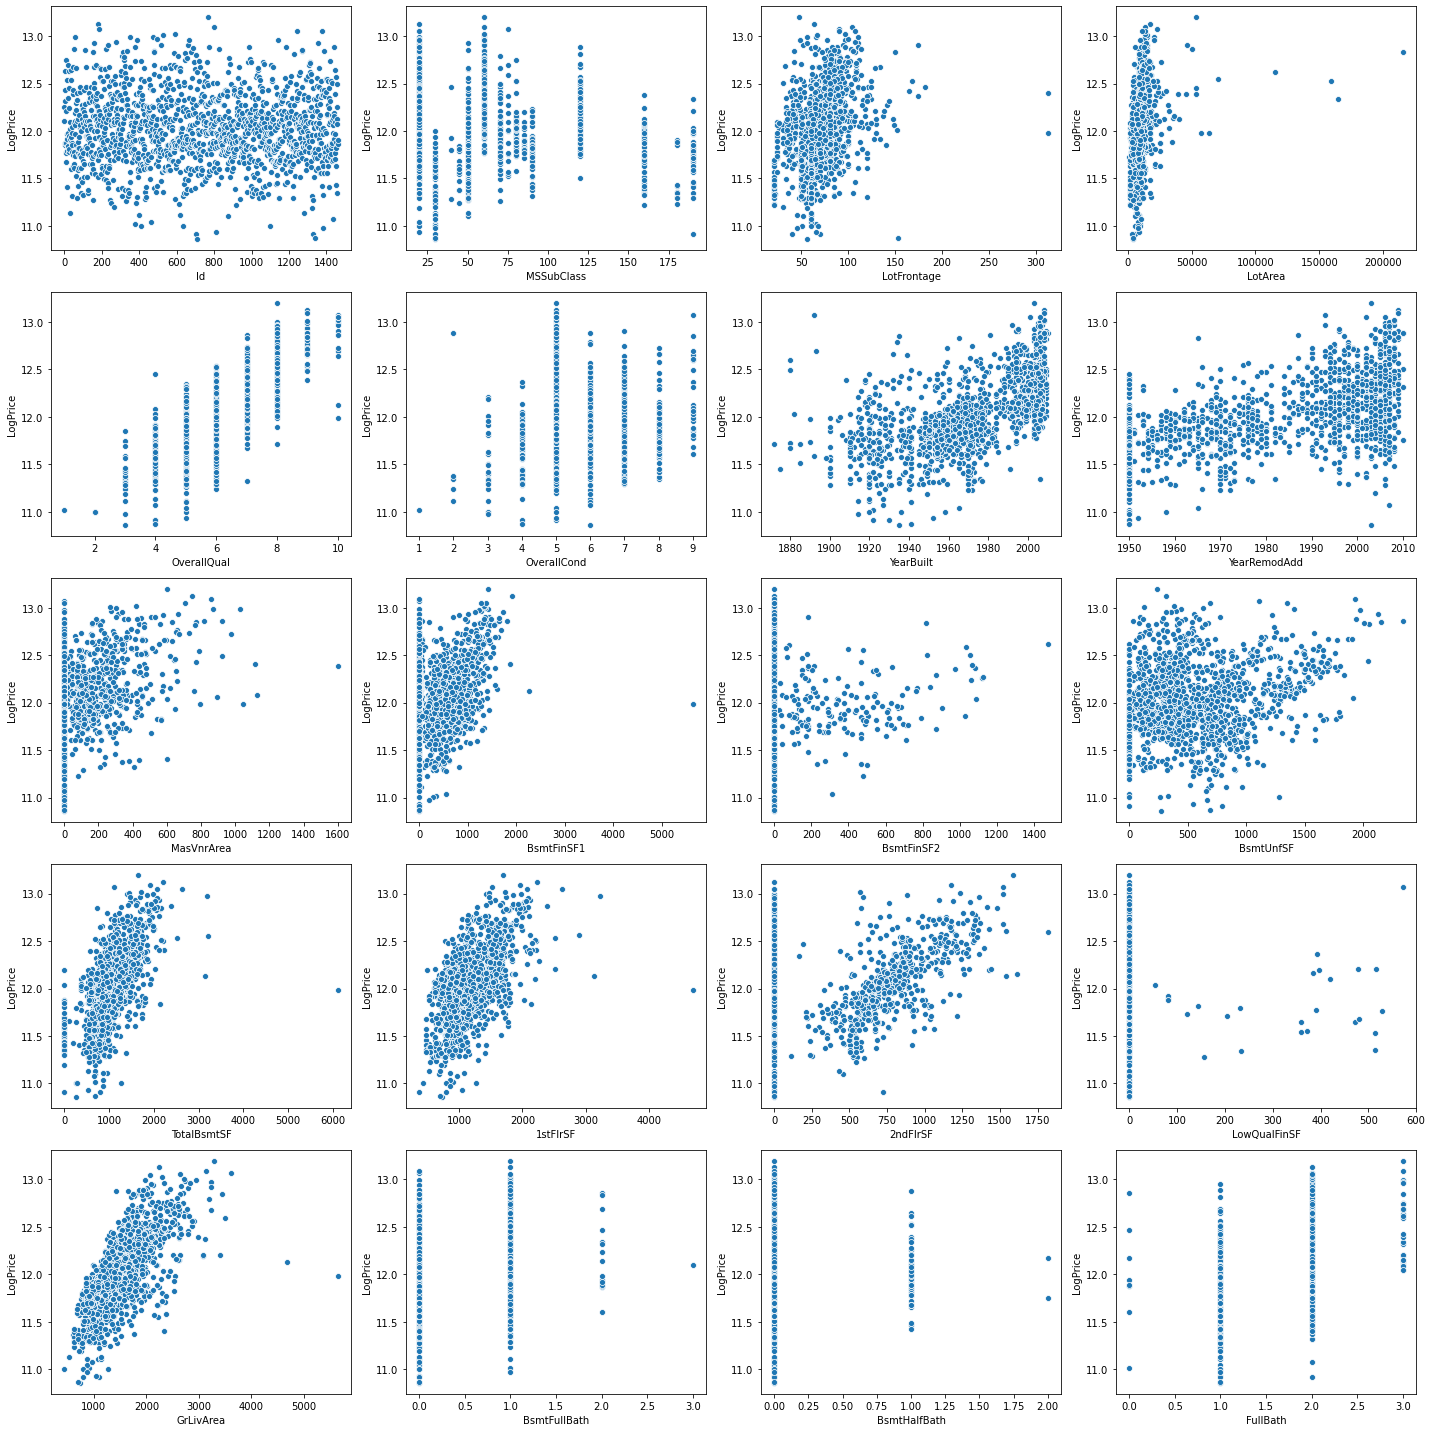

In [13]:
# Visualizing outliers in scatterplot of feature vs target for first 20 numerical columns.
fig, axs = plt.subplots(5,4,figsize=(20,20))
axs = axs.flatten()
for i,col in enumerate(numcols[:20]):
    sns.scatterplot(train[col],train['LogPrice'], ax=axs[i])
    plt.tight_layout()

In [14]:
# First set of outlier based first 20 numerical columns

outlierrows1 = (train['LotFrontage']>200) | (train['LotArea']>100000) | (train['MasVnrArea']>1200) | (train['BsmtFinSF1'] > 3000) | \
                (train['BsmtFinSF2'] > 1200) | (train['TotalBsmtSF'] > 4200) | (train['1stFlrSF'] >3500) | (train['GrLivArea'] >4000) | \
                (train['BsmtFullBath'] > 2) | (train['BsmtHalfBath']> 1) 

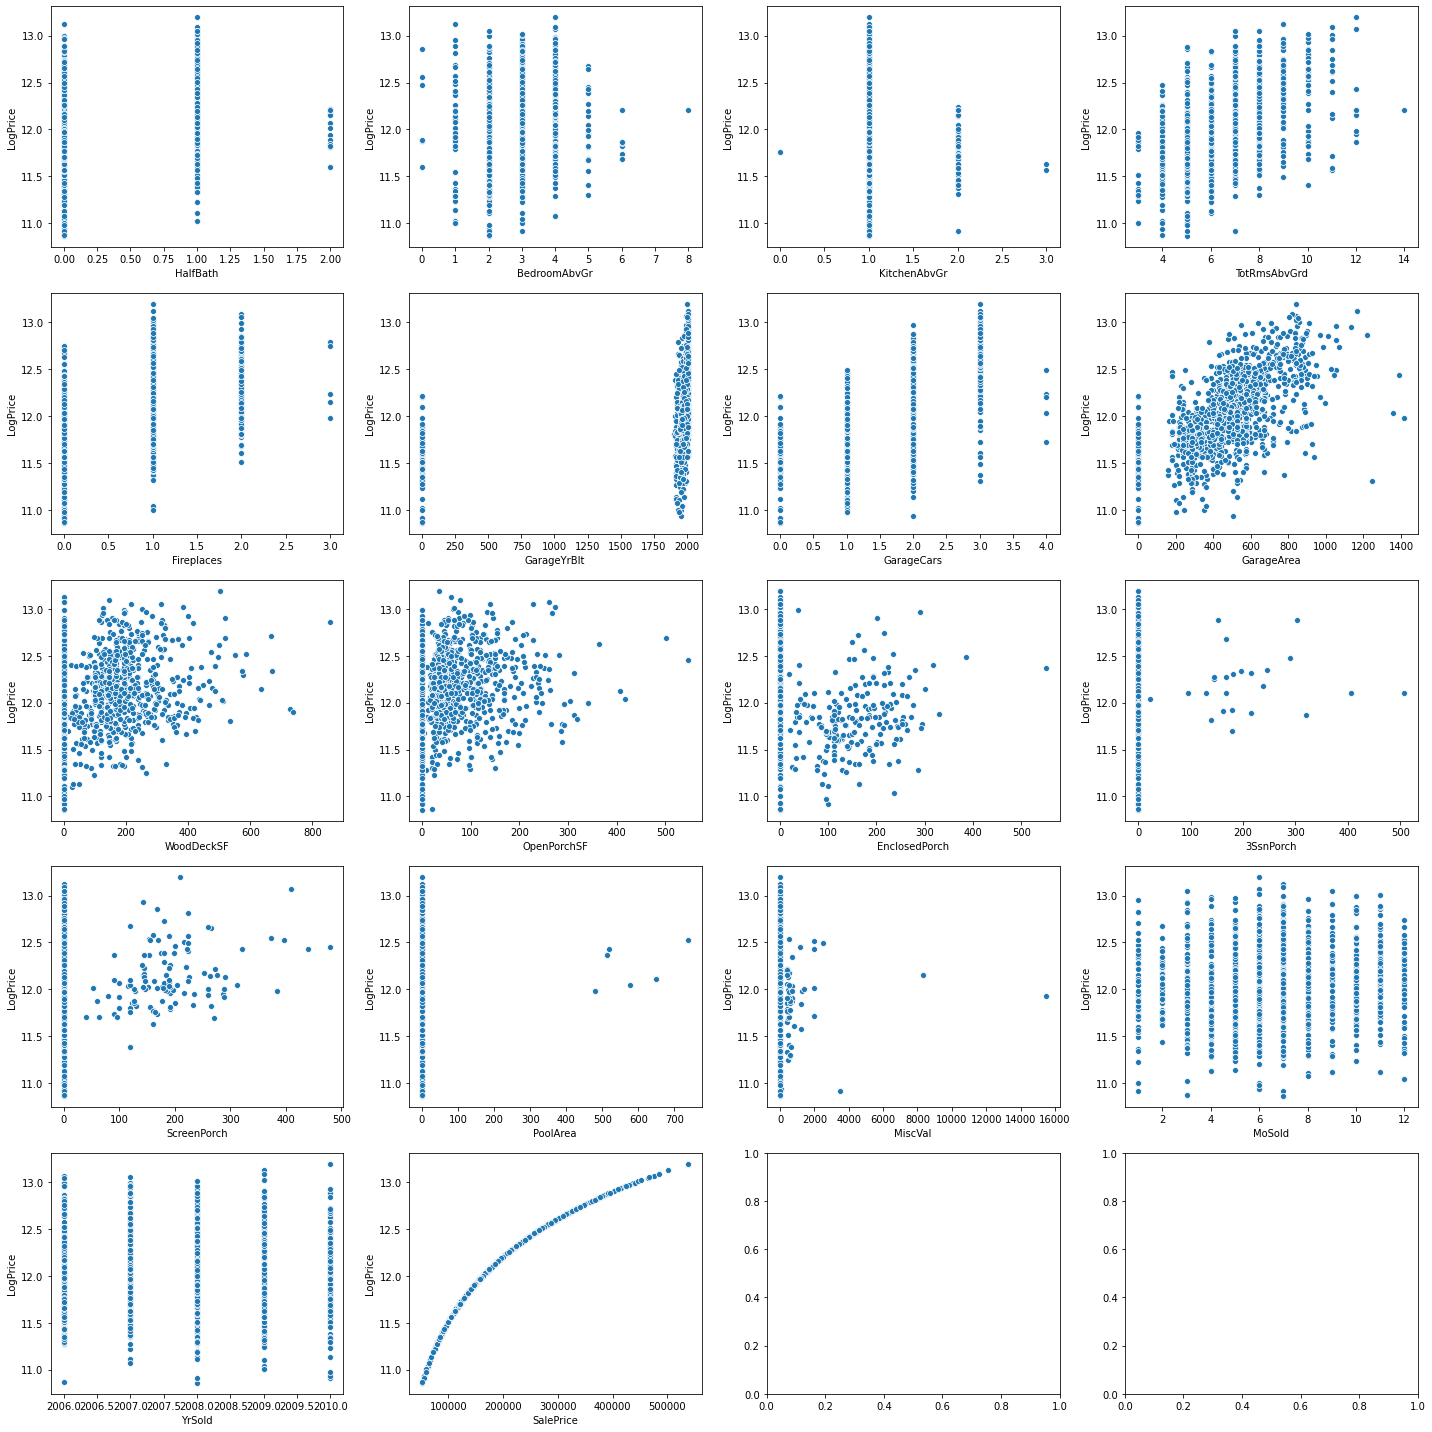

In [15]:
# Visualizing outliers in scatterplot of feature vs target for remaining numerical columns.
fig, axs = plt.subplots(5,4,figsize=(20,20))
axs = axs.flatten()
for i,col in enumerate(numcols[20:]):
    sns.scatterplot(train[col],train['LogPrice'], ax=axs[i])
    plt.tight_layout()

In [16]:
# Second set of outliers based on remaining set of columns

outlierrows2 = (train['BedroomAbvGr'] > 7 ) |(train['KitchenAbvGr'] < 1 ) | (train['KitchenAbvGr'] > 2 ) | \
               (train['TotRmsAbvGrd'] > 12 ) | (train['WoodDeckSF'] > 800 ) | (train['OpenPorchSF'] > 450) | (train['EnclosedPorch'] > 400) | \
               (train['3SsnPorch'] > 350 ) | (train['MiscVal'] > 4000 ) 

# Remove outliers based on features
train = train[~(outlierrows1 | outlierrows2)]

train.shape
                                                                                                               

(1425, 83)

In [17]:
# Test model with data without outliers. Also remove 'Id' column as it has not much information and may affect interpretability of model.
features = train[numcols].columns.drop(['SalePrice','Id'])
test_model(train,features,'LogPrice')

Result of test model

Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Target: LogPrice 

RMSE:21054.6703


Our RMSE score improved significantly by outlier removal step. It has decresed from 157419.8091 to 21054.6703 which is remarkable improvement. It itself proved that unusual behavior of feature had big impact on model parameter estimation (in our case coefficient of linear model).Removing such outliers leads to actual estimate of model parameters.

### Feature Engineering 

We have created set of relevant feature and analyse them together for generating new features

In [18]:
numcols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
# Let's make set of relevant features and analyse them together
s1 = ['LotFrontage', 'LotArea']
s2 = ['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']
s3 = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
s4 = ['1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea']
s5 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath']
s6 = ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
s7 = ['GarageYrBlt', 'GarageCars', 'GarageArea']
s8 = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

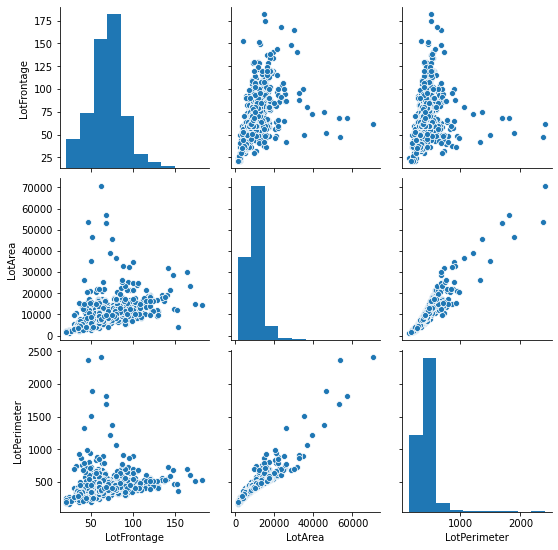

In [20]:
# Feature Engineering using set1 ['LotFrontage', 'LotArea']

# Assuming lot shape is approximately rectangle. We can develop following feature
train['LotPerimeter'] = 2*((train['LotArea']/train['LotFrontage'])+train['LotFrontage'])
s1.extend(['LotPerimeter'])
sns.pairplot(train[s1])

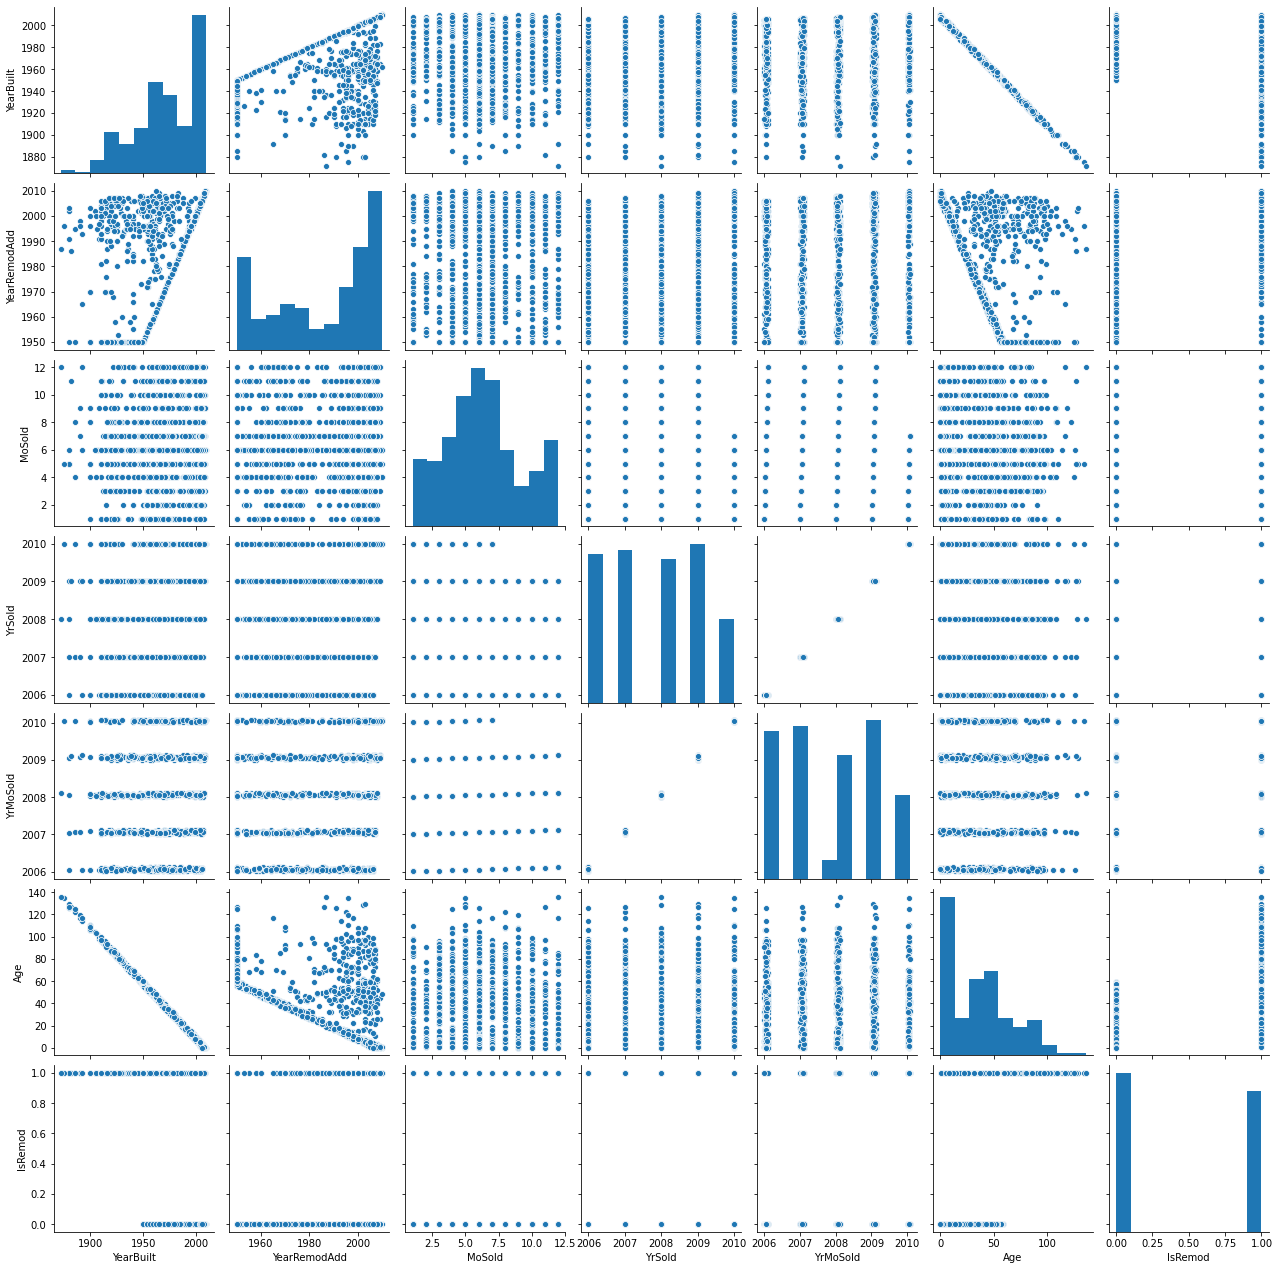

In [21]:
# Feature Engineering using set 2 ['YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']

train['YrMoSold'] = train['YrSold']+0.01*train['MoSold']
train['Age'] = train['YrMoSold'] - train['YearBuilt']
train['IsRemod'] = train['YearBuilt'] != train['YearRemodAdd'] 
train['IsRemod'] = train['IsRemod'].map({True:1,False:0})       # This feature would be useful if we use tree based prediction method

s2.extend(['YrMoSold','Age','IsRemod'])
sns.pairplot(train[s2])

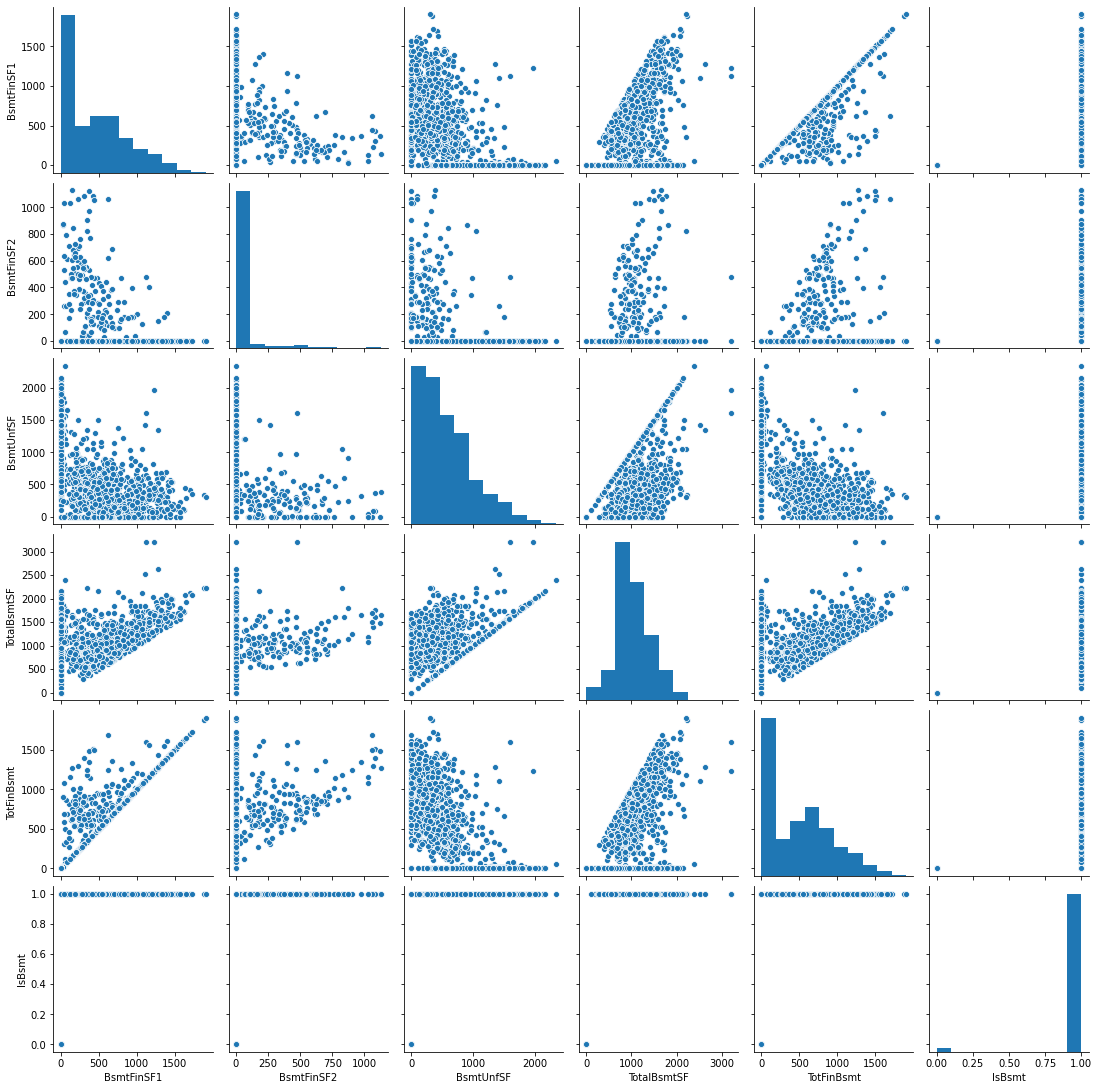

In [22]:
# Feature Engineering using set 3 ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
train['TotFinBsmt'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
train['IsBsmt'] = train['TotalBsmtSF'] != 0        # Useful in tree based modelling
train['IsBsmt'] = train['IsBsmt'].map({True:1,False:0})

s3.extend(['TotFinBsmt','IsBsmt'])
sns.pairplot(train[s3])

In [23]:
# Feature Engineering using Set 5 ['BsmtFullBath', 'FullBath','BsmtHalfBath', 'HalfBath']
train['TotFullBath'] = train['BsmtFullBath']+train['FullBath']
train['TotHalfBath'] = train['BsmtHalfBath'] +train['HalfBath']

# Feature Engineering using set 6 ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
# 'BedroomAbvGr'  is bedroom above grade.  We are not sure about what is grade here. Let's skip this step.

# Feature Engineering using set 7 ['GarageYrBlt', 'GarageCars', 'GarageArea'] - NA

# Feature Engineering using Set 8
train['TotPorch'] = train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+train['ScreenPorch']

In [24]:
# test model with engineered features along with original
dropcols = ['TotRmsAbvGrd','GarageCars','TotalBsmtSF','SalePrice','LogPrice','Id']
features = train.select_dtypes(np.float64).columns.drop(dropcols)
test_model(train,features,'LogPrice')

Result of test model

Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'RoomSize', 'LotPerimeter', 'YrMoSold', 'Age', 'TotFinBsmt', 'TotFullBath', 'TotHalfBath', 'TotPorch'] 

Target: LogPrice 

RMSE:21154.1200


It doesn'nt show any improvement in model performance. It could be possible that we have developed too many features. Therefore, We apply feature selection on further step to select most important features for linear regression model.

In [25]:
len(features)

41

## Feature Selection:

We will apply recursive feature elimination approach. This approach select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained through a coef_ attribute in our case. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Result of test model

Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'LotPerimeter', 'YrMoSold', 'Age', 'TotFinBsmt', 'TotFullBath', 'TotHalfBath', 'TotPorch'] 

Target: LogPrice 

RMSE:20577.0964


Text(0, 0.5, 'Cross Validation Score (MSE)')

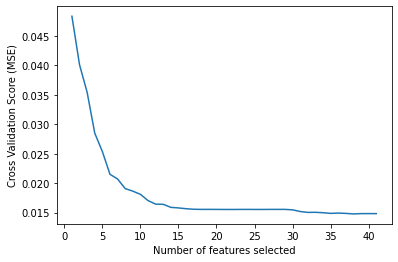

In [26]:
from sklearn.feature_selection import RFECV

scaler = StandardScaler()
all_X = train[features]
all_X = scaler.fit_transform(all_X)
all_y = train['LogPrice'].copy()

selector = RFECV(LinearRegression(), step=1, cv=3,scoring = 'neg_mean_squared_error')
selector = selector.fit(all_X,all_y)

selected_features = features[selector.support_]

test_model(train,selected_features,'LogPrice')
plt.plot(range(1, len(selector.grid_scores_) + 1), -selector.grid_scores_)
plt.xlabel('Number of features selected')
plt.ylabel('Cross Validation Score (MSE)')


number of selected features 38


<BarContainer object of 38 artists>

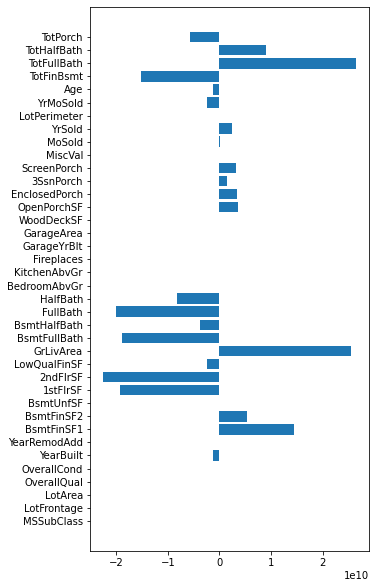

In [27]:
plt.figure(figsize=(5,10))

print('number of selected features',selector.n_features_)
plt.barh(y=selected_features, width = selector.estimator_.coef_)

RFE selected 38 features out of 41. It helps to reduce RMSE further to 20577. It means our assumption of having too many features in the model was correct. In above bar plot we have observed negative regression coefficient for positively correlated features. It's because of marginal effect in regression. 

We able to grab ranking position within **top 10%** on test data just by using EDA and FE for numerical features and with simplistic model. In the next section, we will work on categorical features as well as model selection strategy. We will store all the original and newly genearated features for furhter step.

In [28]:
def transform_feature(df):
    df['RoomSize'] = df['GrLivArea']/df['TotRmsAbvGrd']
    df['LotPerimeter'] = 2*((df['LotArea']/df['LotFrontage']) + df['LotFrontage'])
    df['YrMoSold'] = df['YrSold']+0.01*df['MoSold']
    df['Age'] = df['YrMoSold'] - df['YearBuilt']
    df['IsRemod'] = df['YearBuilt'] != df['YearRemodAdd'] 
    df['IsRemod'] = df['IsRemod'].map({True:1,False:0}) 
    df['TotFinBsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
    df['IsBsmt'] = df['TotalBsmtSF'] != 0                    # Useful in tree based modelling
    df['IsBsmt'] = df['IsBsmt'].map({True:1,False:0})
    df['TotFullBath'] = df['BsmtFullBath']+df['FullBath']
    df['TotHalfBath'] = df['BsmtHalfBath'] +df['HalfBath']
    df['TotPorch'] = df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']
    
    return df

    

In [29]:
holdout = transform_feature(test)

scaled_df = pd.DataFrame(scaler.transform(holdout[features]),columns = features)

pred = selector.predict(scaled_df)

pred =np.exp(pred) - 1

submission_df = pd.DataFrame({'Id':holdout['Id'].astype(int),'SalePrice':pred})
submission_df.to_csv('submission.csv',index= False)


In [30]:
train.to_csv('engineered_train.csv',index=False)
holdout.to_csv('engineered_test.csv',index=False)